# Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [2]:
dataset =  pd.read_csv("Diabetes.csv")

# Check For The Null Values

In [3]:
dataset.isnull().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

In [4]:
dataset

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


# Dropping of id as there are all unique values

In [5]:
dataset.drop(columns = "id",inplace=True)

# Checking Dustribution

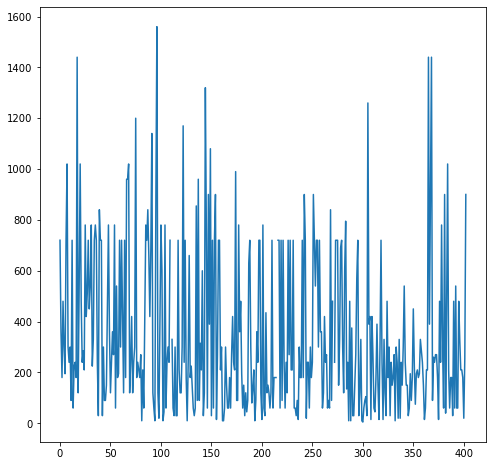

In [6]:
plt.figure(figsize=(8,8))
plt.plot(dataset["time.ppn"])
plt.show()

# Filling NAN Values as median of that columns

In [7]:
dataset["weight"].fillna(dataset["weight"].median(),inplace=True)

In [8]:
dataset["height"].fillna(dataset["height"].median(),inplace=True)

In [9]:
dataset["hdl"].fillna(dataset["hdl"].median(),inplace=True)

In [10]:
dataset["ratio"].fillna(dataset["ratio"].median(),inplace=True)
# 

In [11]:
dataset["bp.1s"].fillna(dataset["bp.1s"].median(),inplace=True)

In [12]:
dataset["bp.1d"].fillna(dataset["bp.1d"].median(),inplace=True)

In [13]:
dataset["chol"].fillna(dataset["chol"].median(),inplace=True)

In [14]:
dataset["bp.2s"].fillna(dataset["bp.2s"].median(),inplace=True)

In [15]:
dataset["bp.2d"].fillna(dataset["bp.2d"].median(),inplace=True)

In [16]:
dataset["waist"].fillna(dataset["waist"].median(),inplace=True)

In [17]:
dataset["hip"].fillna(dataset["hip"].median(),inplace=True)

In [18]:
dataset["time.ppn"].fillna(dataset["time.ppn"].median(),inplace=True)

# bp.2s , bp.2d Too many NAN values so dropping values

In [19]:
dataset.drop(columns=["bp.2s","bp.2d"],inplace=True)

In [20]:
dataset["frame"].fillna("medium",inplace=True)

In [21]:
dataset

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0
399,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0
400,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0
401,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0


In [22]:
len(dataset["weight"].unique())

141

In [23]:
dataset["location"].unique()

array(['Buckingham', 'Louisa'], dtype=object)

In [24]:
dataset["glyhb"].fillna(dataset["glyhb"].median(),inplace=True)

In [25]:
dataset.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64

In [26]:
dataset

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0
399,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0
400,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0
401,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0


# Standardisation of all the columns as there must not be much diffrence in column values Very important for distance based values not much of a effect on trees based values

In [27]:
# dataset["bp.1s"] = np.log(dataset["bp.1s"]) 

In [28]:
# dataset["hdl"] = np.log(dataset["hdl"]) 

In [29]:
# dataset["height"] = np.log(dataset["height"]) 

In [30]:
# dataset["age"] = np.log(dataset["age"]) 

In [31]:
# dataset["bp.1d"] = np.log(dataset["bp.1d"]) 

In [32]:
dataset["ratio"] = np.log(dataset["ratio"]) 
# 

In [33]:
# dataset["stab.glu"] = np.sqrt(dataset["stab.glu"])

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc = StandardScaler()

In [35]:
dataset["stab.glu"] =  sc.fit_transform(dataset["stab.glu"].values.reshape(403,1))

In [36]:
dataset['hdl'] = sc.fit_transform(dataset["hdl"].values.reshape(403,1))

In [37]:
dataset["ratio"] = sc.fit_transform(dataset["ratio"].values.reshape(403,1))

In [38]:
dataset['waist'] = sc.fit_transform(dataset["waist"].values.reshape(403,1))

In [39]:
dataset["weight"] = sc.fit_transform(dataset["weight"].values.reshape(403,1))

In [40]:
dataset["chol"] = sc.fit_transform(dataset["chol"].values.reshape(403,1))

In [41]:
dataset["bp.1s"] = sc.fit_transform(dataset["bp.1s"].values.reshape(403,1))

In [42]:
dataset["bp.1d"] = sc.fit_transform(dataset["bp.1d"].values.reshape(403,1))

In [43]:
dataset["time.ppn"] = sc.fit_transform(dataset["time.ppn"].values.reshape(403,1))

In [44]:
dataset["hip"] = sc.fit_transform(dataset["hip"].values.reshape(403,1))

In [45]:
dataset["age"] = sc.fit_transform(dataset["age"].values.reshape(403,1))

In [46]:
dataset["height"] = sc.fit_transform(dataset["height"].values.reshape(403,1))

In [47]:
dataset

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,-0.109082,-0.465424,0.323193,-0.476985,4.310000,Buckingham,-0.052241,female,-1.033584,-1.406006,medium,-0.837049,-1.801924,-1.558395,-0.893303,1.231660
1,-0.966182,-0.182462,-1.534986,1.396400,4.440000,Buckingham,-1.095693,female,-0.519344,1.004457,large,-1.102872,-1.134688,1.419726,0.880976,0.063298
2,0.454799,-0.276783,-0.780101,1.088371,4.640000,Buckingham,0.684313,female,-1.290704,1.948762,large,2.352839,0.644608,1.945276,2.477827,-0.520882
3,-2.928491,-0.257919,-2.231804,1.224437,4.630000,Buckingham,1.236729,male,0.252016,-1.455706,large,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
4,0.928460,-0.314511,-1.302714,2.129326,7.720000,Buckingham,1.052590,male,0.509136,0.134703,medium,0.049031,-0.245040,1.069359,-0.361020,-0.131429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1.988557,4.948571,-0.257488,1.179792,16.110001,Louisa,0.377415,male,0.766256,-0.113799,medium,0.049031,0.792883,-0.507293,-0.715875,-0.423519
399,1.717894,-0.333375,0.207057,0.636739,4.390000,Louisa,0.254656,female,-0.776464,-0.585951,medium,0.137639,1.237707,-1.032844,-0.006164,-0.520882
400,-0.312080,3.062162,-0.722033,0.525974,13.630000,Louisa,-1.095693,female,0.766256,-0.262900,small,-0.748441,-0.986413,-0.857660,-0.538447,-1.040154
401,-0.199303,-0.578608,0.090921,-0.321297,4.490000,Louisa,-0.359139,female,-0.776464,0.482604,medium,-0.748441,-0.393314,0.543808,0.880976,-0.277474


In [48]:
dataset.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64

# ===========================================

In [227]:
# lg_glyhb = np.log(dataset["ratio"])

# lg = np.log(lg_glyhb)

# dataset["stab.glu"] = np.log(dataset["stab.glu"])

# dataset["hdl"] = np.sqrt(dataset["hdl"])



# dataset["weight"] = np.log(dataset["weight"])

# dataset["waist"] = np.log(dataset["waist"])

In [228]:
dataset.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,-0.109082,-0.465424,0.323193,-0.476985,4.31,Buckingham,-0.052241,female,-1.033584,-1.406006,medium,-0.837049,-1.801924,-1.558395,-0.893303,1.231660
1,-0.966182,-0.182462,-1.534986,1.396400,4.44,Buckingham,-1.095693,female,-0.519344,1.004457,large,-1.102872,-1.134688,1.419726,0.880976,0.063298
2,0.454799,-0.276783,-0.780101,1.088371,4.64,Buckingham,0.684313,female,-1.290704,1.948762,large,2.352839,0.644608,1.945276,2.477827,-0.520882
3,-2.928491,-0.257919,-2.231804,1.224437,4.63,Buckingham,1.236729,male,0.252016,-1.455706,large,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
4,0.928460,-0.314511,-1.302714,2.129326,7.72,Buckingham,1.052590,male,0.509136,0.134703,medium,0.049031,-0.245040,1.069359,-0.361020,-0.131429


# Checking Distribution

Text(0, 0.5, 'Frequency')

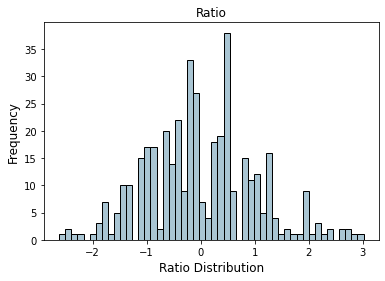

In [229]:
fig,ax = plt.subplots()
dataset["bp.1d"].hist(bins=50,color='#A9C5D3',edgecolor='black',grid=False)
ax.set_title('Ratio', fontsize=12)
ax.set_xlabel('Ratio Distribution', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Frequency')

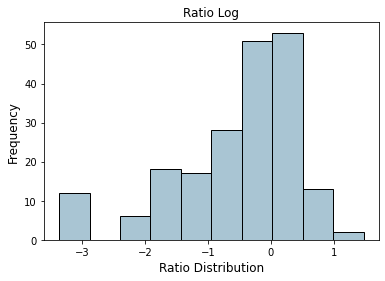

In [230]:
fig,ax = plt.subplots()
np.log(dataset["ratio"]).hist(bins=10,color='#A9C5D3',edgecolor='black',grid=False)
ax.set_title('Ratio Log', fontsize=12)
ax.set_xlabel('Ratio Distribution', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

<Figure size 1440x720 with 0 Axes>

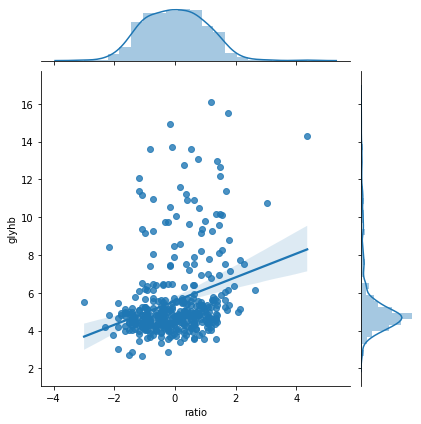

In [231]:
plt.figure(figsize=(20,10))
sns.jointplot(x=dataset["ratio"],y=dataset["glyhb"],kind="reg")
plt.show()

In [232]:
dataset

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,-0.109082,-0.465424,0.323193,-0.476985,4.310000,Buckingham,-0.052241,female,-1.033584,-1.406006,medium,-0.837049,-1.801924,-1.558395,-0.893303,1.231660
1,-0.966182,-0.182462,-1.534986,1.396400,4.440000,Buckingham,-1.095693,female,-0.519344,1.004457,large,-1.102872,-1.134688,1.419726,0.880976,0.063298
2,0.454799,-0.276783,-0.780101,1.088371,4.640000,Buckingham,0.684313,female,-1.290704,1.948762,large,2.352839,0.644608,1.945276,2.477827,-0.520882
3,-2.928491,-0.257919,-2.231804,1.224437,4.630000,Buckingham,1.236729,male,0.252016,-1.455706,large,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
4,0.928460,-0.314511,-1.302714,2.129326,7.720000,Buckingham,1.052590,male,0.509136,0.134703,medium,0.049031,-0.245040,1.069359,-0.361020,-0.131429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1.988557,4.948571,-0.257488,1.179792,16.110001,Louisa,0.377415,male,0.766256,-0.113799,medium,0.049031,0.792883,-0.507293,-0.715875,-0.423519
399,1.717894,-0.333375,0.207057,0.636739,4.390000,Louisa,0.254656,female,-0.776464,-0.585951,medium,0.137639,1.237707,-1.032844,-0.006164,-0.520882
400,-0.312080,3.062162,-0.722033,0.525974,13.630000,Louisa,-1.095693,female,0.766256,-0.262900,small,-0.748441,-0.986413,-0.857660,-0.538447,-1.040154
401,-0.199303,-0.578608,0.090921,-0.321297,4.490000,Louisa,-0.359139,female,-0.776464,0.482604,medium,-0.748441,-0.393314,0.543808,0.880976,-0.277474


In [233]:
dataset["location"]

0      Buckingham
1      Buckingham
2      Buckingham
3      Buckingham
4      Buckingham
          ...    
398        Louisa
399        Louisa
400        Louisa
401        Louisa
402        Louisa
Name: location, Length: 403, dtype: object

In [234]:
dataset.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64

In [235]:
y = dataset["glyhb"]
dataset.drop(columns="glyhb",inplace=True)

In [236]:
from sklearn.model_selection import train_test_split

# Splitting train and test values

In [237]:
x_train,x_test,y_train,y_test = train_test_split(dataset,y,test_size=0.2,random_state=42)

In [238]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((322, 15), (322,), (81, 15), (81,))

In [239]:
# x_train.drop(columns=["waist","hip","ratio"],inplace=True)
# x_test.drop(columns=["waist","hip","ratio"],inplace=True)

# Feature Engineering

In [240]:
x_train

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
353,-0.041417,-0.446559,1.020010,-1.001985,Louisa,0.316036,male,0.766256,-0.610801,small,0.137639,1.089433,-0.332110,-0.538447,-0.472201
233,-0.266969,0.157092,0.671602,-0.816145,Louisa,0.193277,male,0.252016,-0.933853,medium,1.732583,1.979081,-0.507293,-1.070731,-0.910336
3,-2.928491,-0.257919,-2.231804,1.224437,Buckingham,1.236729,male,0.252016,-1.455706,large,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
18,-0.312080,-0.484288,-0.838169,0.690563,Louisa,-0.666036,male,-0.519344,-1.281755,medium,-1.191480,-0.541589,-1.383211,-1.603015,-0.715609
131,-0.447411,-0.559744,-0.315556,-0.033104,Louisa,-0.972934,female,0.252016,1.228108,medium,-0.659833,-0.986413,1.594909,1.768115,-0.650700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.988738,-0.389967,-0.605897,-0.102494,Buckingham,-1.463970,female,0.766256,1.675411,large,-0.482617,-0.615726,1.069359,0.703548,0.258025
106,1.920891,-0.408831,2.529781,-0.907566,Louisa,-0.972934,female,0.252016,0.557155,medium,-1.191480,0.496334,0.543808,-0.183592,-0.326155
270,-1.372177,-0.389967,-0.954305,0.034653,Buckingham,-0.543277,male,0.766256,0.681405,small,-0.305401,0.941158,0.193441,-0.361020,0.452752
348,-1.936059,-0.465424,-0.431692,-1.200652,Louisa,-0.666036,female,1.280495,0.134703,medium,-1.191480,-0.245040,0.543808,0.348692,-0.812973


In [241]:
x_test.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64

In [242]:
x_train

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
353,-0.041417,-0.446559,1.020010,-1.001985,Louisa,0.316036,male,0.766256,-0.610801,small,0.137639,1.089433,-0.332110,-0.538447,-0.472201
233,-0.266969,0.157092,0.671602,-0.816145,Louisa,0.193277,male,0.252016,-0.933853,medium,1.732583,1.979081,-0.507293,-1.070731,-0.910336
3,-2.928491,-0.257919,-2.231804,1.224437,Buckingham,1.236729,male,0.252016,-1.455706,large,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
18,-0.312080,-0.484288,-0.838169,0.690563,Louisa,-0.666036,male,-0.519344,-1.281755,medium,-1.191480,-0.541589,-1.383211,-1.603015,-0.715609
131,-0.447411,-0.559744,-0.315556,-0.033104,Louisa,-0.972934,female,0.252016,1.228108,medium,-0.659833,-0.986413,1.594909,1.768115,-0.650700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.988738,-0.389967,-0.605897,-0.102494,Buckingham,-1.463970,female,0.766256,1.675411,large,-0.482617,-0.615726,1.069359,0.703548,0.258025
106,1.920891,-0.408831,2.529781,-0.907566,Louisa,-0.972934,female,0.252016,0.557155,medium,-1.191480,0.496334,0.543808,-0.183592,-0.326155
270,-1.372177,-0.389967,-0.954305,0.034653,Buckingham,-0.543277,male,0.766256,0.681405,small,-0.305401,0.941158,0.193441,-0.361020,0.452752
348,-1.936059,-0.465424,-0.431692,-1.200652,Louisa,-0.666036,female,1.280495,0.134703,medium,-1.191480,-0.245040,0.543808,0.348692,-0.812973


# MAPE Metric Function

In [243]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual-y_pred)/y_actual))
    return mape

In [245]:
# def MAE(y_actual,y_pred):
#     mape = np.mean(np.abs((y_actual-y_pred)/y_actual))
#     return mape

# Catboost without Embedding

In [246]:
from catboost import CatBoostRegressor

In [247]:
# cb = CatBoostRegressor(depth=5,iterations=300,l2_leaf_reg= 10)72.81
# # ,learning_rate=0.1



# cb = CatBoostRegressor(depth=5,iterations=400,l2_leaf_reg= 32)0.7293744365862816
# # ,learning_rate=0.1

In [248]:
# cb = CatBoostRegressor?
# # ,learning_rate=0.1

In [249]:
cb = CatBoostRegressor(depth=5,iterations=400,l2_leaf_reg= 32)
# ,learning_rate=0.1

In [250]:
cat_features_index = [4,6,9]

In [251]:
cb.fit(x_train,y_train,cat_features=cat_features_index)

0:	learn: 2.1626393	total: 43.6ms	remaining: 17.4s
1:	learn: 2.1447458	total: 71ms	remaining: 14.1s
2:	learn: 2.1354927	total: 90.5ms	remaining: 12s
3:	learn: 2.1236222	total: 109ms	remaining: 10.8s
4:	learn: 2.1113628	total: 129ms	remaining: 10.2s
5:	learn: 2.0954351	total: 148ms	remaining: 9.7s
6:	learn: 2.0807900	total: 167ms	remaining: 9.37s
7:	learn: 2.0717826	total: 186ms	remaining: 9.12s
8:	learn: 2.0594591	total: 209ms	remaining: 9.09s
9:	learn: 2.0475542	total: 228ms	remaining: 8.89s
10:	learn: 2.0321701	total: 250ms	remaining: 8.84s
11:	learn: 2.0179554	total: 265ms	remaining: 8.56s
12:	learn: 2.0025115	total: 269ms	remaining: 8.02s
13:	learn: 1.9879614	total: 284ms	remaining: 7.82s
14:	learn: 1.9794633	total: 304ms	remaining: 7.81s
15:	learn: 1.9655934	total: 317ms	remaining: 7.6s
16:	learn: 1.9553229	total: 332ms	remaining: 7.48s
17:	learn: 1.9475857	total: 347ms	remaining: 7.37s
18:	learn: 1.9416107	total: 362ms	remaining: 7.27s
19:	learn: 1.9332484	total: 378ms	remaining:

169:	learn: 1.3411620	total: 2.67s	remaining: 3.61s
170:	learn: 1.3391621	total: 2.68s	remaining: 3.59s
171:	learn: 1.3361310	total: 2.7s	remaining: 3.58s
172:	learn: 1.3335561	total: 2.72s	remaining: 3.57s
173:	learn: 1.3319993	total: 2.74s	remaining: 3.56s
174:	learn: 1.3300254	total: 2.75s	remaining: 3.53s
175:	learn: 1.3285741	total: 2.76s	remaining: 3.52s
176:	learn: 1.3274867	total: 2.78s	remaining: 3.5s
177:	learn: 1.3264107	total: 2.79s	remaining: 3.48s
178:	learn: 1.3255055	total: 2.81s	remaining: 3.47s
179:	learn: 1.3236823	total: 2.82s	remaining: 3.45s
180:	learn: 1.3224903	total: 2.83s	remaining: 3.43s
181:	learn: 1.3202442	total: 2.86s	remaining: 3.42s
182:	learn: 1.3193097	total: 2.86s	remaining: 3.39s
183:	learn: 1.3175406	total: 2.88s	remaining: 3.38s
184:	learn: 1.3167012	total: 2.89s	remaining: 3.36s
185:	learn: 1.3151311	total: 2.9s	remaining: 3.34s
186:	learn: 1.3133375	total: 2.92s	remaining: 3.32s
187:	learn: 1.3120264	total: 2.94s	remaining: 3.31s
188:	learn: 1.3

347:	learn: 1.1027303	total: 4.88s	remaining: 729ms
348:	learn: 1.1004073	total: 4.89s	remaining: 715ms
349:	learn: 1.0996184	total: 4.9s	remaining: 701ms
350:	learn: 1.0982474	total: 4.92s	remaining: 687ms
351:	learn: 1.0969903	total: 4.93s	remaining: 673ms
352:	learn: 1.0965095	total: 4.95s	remaining: 659ms
353:	learn: 1.0957898	total: 4.96s	remaining: 645ms
354:	learn: 1.0952699	total: 4.98s	remaining: 632ms
355:	learn: 1.0938636	total: 5s	remaining: 618ms
356:	learn: 1.0923093	total: 5.02s	remaining: 605ms
357:	learn: 1.0914208	total: 5.03s	remaining: 591ms
358:	learn: 1.0906538	total: 5.05s	remaining: 577ms
359:	learn: 1.0894178	total: 5.06s	remaining: 562ms
360:	learn: 1.0880840	total: 5.08s	remaining: 548ms
361:	learn: 1.0876560	total: 5.09s	remaining: 535ms
362:	learn: 1.0873141	total: 5.11s	remaining: 521ms
363:	learn: 1.0864831	total: 5.13s	remaining: 508ms
364:	learn: 1.0848554	total: 5.15s	remaining: 494ms
365:	learn: 1.0843940	total: 5.16s	remaining: 479ms
366:	learn: 1.08

In [252]:
cb.score(x_train,y_train)

0.7621118920836301

In [253]:
y_pred = cb.predict(x_test)

In [254]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [255]:
r2_score(y_test,y_pred)

0.7293829017413725

In [256]:
mean_absolute_error(y_test,y_pred)

0.7608298520671232

In [257]:
MAPE(y_test,y_pred)

0.1228867235626524

# Unique Values Preprocessing

In [258]:
x_train["location"].unique()

array(['Louisa', 'Buckingham'], dtype=object)

In [259]:
x_train["gender"].unique()

array(['male', 'female'], dtype=object)

In [260]:
x_train["frame"].unique()

array(['small', 'medium', 'large'], dtype=object)

# Label Encoding

In [261]:
from sklearn.preprocessing import LabelEncoder

In [262]:
le = LabelEncoder()

In [263]:
combine = x_train.append(x_test)

In [264]:
combine.shape

(403, 15)

In [265]:
combine["location"] = le.fit_transform(combine["location"])

In [266]:
combine["gender"] = le.fit_transform(combine["gender"])

In [267]:
combine["frame"] = le.fit_transform(combine["frame"])

# One Hot Encoding

In [268]:
combine

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
353,-0.041417,-0.446559,1.020010,-1.001985,1,0.316036,1,0.766256,-0.610801,2,0.137639,1.089433,-0.332110,-0.538447,-0.472201
233,-0.266969,0.157092,0.671602,-0.816145,1,0.193277,1,0.252016,-0.933853,1,1.732583,1.979081,-0.507293,-1.070731,-0.910336
3,-2.928491,-0.257919,-2.231804,1.224437,0,1.236729,1,0.252016,-1.455706,0,-1.191480,-2.469160,-0.857660,-0.893303,0.452752
18,-0.312080,-0.484288,-0.838169,0.690563,1,-0.666036,1,-0.519344,-1.281755,1,-1.191480,-0.541589,-1.383211,-1.603015,-0.715609
131,-0.447411,-0.559744,-0.315556,-0.033104,1,-0.972934,0,0.252016,1.228108,1,-0.659833,-0.986413,1.594909,1.768115,-0.650700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.793128,-1.031346,0.497397,-0.102494,0,-0.604657,0,-0.519344,1.377209,1,-1.191480,-0.096765,1.945276,2.477827,-0.812973
90,-1.101514,-0.352239,-0.431692,-0.398089,1,-0.543277,1,0.509136,-0.213199,0,0.049031,-0.319177,-0.682477,-0.538447,1.134296
248,0.657797,0.213684,-0.315556,0.636739,0,1.605006,0,-0.519344,-0.088949,0,1.112327,-0.615726,0.018257,0.171264,-0.131429
337,1.199123,-0.107006,1.891032,-0.907566,1,0.316036,0,-0.519344,0.507454,1,0.669287,0.644608,0.718992,1.058404,-1.040154


In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
combine = pd.concat([combine,pd.get_dummies(combine["frame"])],axis=1)
combine.drop(columns="frame",inplace=True)

In [133]:
combine

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
353,-0.041417,-0.446559,1.020010,1.098612,4.88,1,52,1,69.0,-0.610801,2,140.0,98.0,-0.332110,40.0,195.0
233,-0.266969,0.157092,0.671602,1.163151,4.34,1,50,1,67.0,-0.933853,1,176.0,110.0,-0.507293,37.0,60.0
3,-2.928491,-0.257919,-2.231804,1.871802,4.63,0,67,1,67.0,-1.455706,0,110.0,50.0,-0.857660,38.0,480.0
18,-0.312080,-0.484288,-0.838169,1.686399,5.28,1,36,1,64.0,-1.281755,1,110.0,76.0,-1.383211,34.0,120.0
131,-0.447411,-0.559744,-0.315556,1.435084,4.79,1,31,0,67.0,1.228108,1,122.0,70.0,1.594909,53.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.793128,-1.031346,0.497397,1.410987,4.41,0,37,0,64.0,1.377209,1,110.0,82.0,1.945276,57.0,90.0
90,-1.101514,-0.352239,-0.431692,1.308333,5.02,1,38,1,68.0,-0.213199,0,138.0,79.0,-0.682477,40.0,690.0
248,0.657797,0.213684,-0.315556,1.667707,7.51,0,73,0,64.0,-0.088949,0,162.0,75.0,0.018257,44.0,300.0
337,1.199123,-0.107006,1.891032,1.131402,5.12,1,52,0,64.0,0.507454,1,152.0,92.0,0.718992,49.0,20.0


# Separation OF Train And Test after using embedding

In [269]:
x_train = combine.iloc[:322]
x_test = combine.iloc[322:]

In [270]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((322, 15), (322,), (81, 15), (81,))

In [271]:
score = make_scorer(r2_score)

# Model Building XGBOOST

In [272]:
from xgboost import XGBRegressor,XGBRFRegressor

In [273]:
xg = XGBRegressor(max_depth = 2,n_estimators = 20,learning_rate=0.32)
# ,reg_lambda=,learning_rate=,reg_alpha=

In [274]:
k = KFold(n_splits=5,random_state=42,shuffle=True)

In [275]:
scores = cross_val_score(xg,x_train,y_train,scoring =score,cv=k,n_jobs=-1)

In [276]:
scores1 = cross_val_score(xg,combine,y,scoring =score,cv=k,n_jobs=-1)

In [277]:
scores

array([0.42359336, 0.34674445, 0.56667213, 0.55252621, 0.59021802])

In [278]:
scores1

array([-0.13061032, -0.08236017, -0.18117812, -0.26787831, -0.09706925])

In [279]:
np.median(scores)

0.552526208072654

In [280]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.32, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
xg.score(x_train,y_train)

0.7635304865795016

In [282]:
y_xgb = xg.predict(x_test)

In [283]:
y_train

353    4.88
233    4.34
3      4.63
18     5.28
131    4.79
       ... 
71     5.23
106    5.17
270    4.62
348    3.98
102    5.44
Name: glyhb, Length: 322, dtype: float64

# R2 Score XGB

In [284]:
r2_score(y_test,y_xgb)

0.6682308059723767

# MAE For XGB

In [285]:
mean_absolute_error(y_test,y_xgb)

0.8330734899196446

In [286]:
mean_squared_error(y_test,y_xgb)

1.790000005587964

# Mean Square Error

In [287]:
np.sqrt(mean_squared_error(y_test,y_xgb))

1.3379088181142853

In [288]:
MAPE(y_test,y_xgb)

0.13303338929509

# XGBOOST Best Parameter

In [79]:
imp_features = sorted(np.stack((x_test.columns,xg.feature_importances_),axis=1),key=lambda x_train:x_train[1],reverse=True)[:12]

In [80]:
imp_features_np = np.array(imp_features)

In [81]:
np.sum(imp_features_np[:,1:])

1.0000000074505806

In [82]:
combine = x_train.append(x_test)

In [83]:
imp_features

[array(['stab.glu', 0.45104098320007324], dtype=object),
 array(['time.ppn', 0.09448936581611633], dtype=object),
 array(['hip', 0.0847371518611908], dtype=object),
 array(['waist', 0.06900504976511002], dtype=object),
 array(['age', 0.06664318591356277], dtype=object),
 array(['weight', 0.06296173483133316], dtype=object),
 array(['ratio', 0.05283845588564873], dtype=object),
 array(['chol', 0.03618239983916283], dtype=object),
 array(['hdl', 0.035990748554468155], dtype=object),
 array(['height', 0.02426481433212757], dtype=object),
 array(['location', 0.021846117451786995], dtype=object),
 array(['gender', 0.0], dtype=object)]

In [84]:
imp_features = list(np.array(imp_features)[:,0])

In [85]:
combine_imp_features = combine[imp_features]

In [86]:
x_train_imp_features = combine_imp_features[:322]
x_test_imp_features = combine_imp_features[322:]

In [87]:
x_train_imp_features

,stab.glu,time.ppn,hip,waist,age,weight,ratio,chol,hdl,height,location,gender
353,-0.446559,-0.472201,-0.538447,-0.332110,0.316036,-0.610801,-1.001985,-0.041417,1.020010,0.766256,1,1
233,0.157092,-0.910336,-1.070731,-0.507293,0.193277,-0.933853,-0.816145,-0.266969,0.671602,0.252016,1,1
3,-0.257919,0.452752,-0.893303,-0.857660,1.236729,-1.455706,1.224437,-2.928491,-2.231804,0.252016,0,1
18,-0.484288,-0.715609,-1.603015,-1.383211,-0.666036,-1.281755,0.690563,-0.312080,-0.838169,-0.519344,1,1
131,-0.559744,-0.650700,1.768115,1.594909,-0.972934,1.228108,-0.033104,-0.447411,-0.315556,0.252016,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.389967,0.258025,0.703548,1.069359,-1.463970,1.675411,-0.102494,-0.988738,-0.605897,0.766256,0,0
106,-0.408831,-0.326155,-0.183592,0.543808,-0.972934,0.557155,-0.907566,1.920891,2.529781,0.252016,1,0
270,-0.389967,0.452752,-0.361020,0.193441,-0.543277,0.681405,0.034653,-1.372177,-0.954305,0.766256,0,1
348,-0.465424,-0.812973,0.348692,0.543808,-0.666036,0.134703,-1.200652,-1.936059,-0.431692,1.280495,1,0


In [88]:
xg.fit(x_train_imp_features,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.32, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
xg.score(x_train_imp_features,y_train)

0.7635304865795016

In [90]:
y_imp_features_xgb = xg.predict(x_test_imp_features)

In [91]:
r2_score(y_test,y_imp_features_xgb) 

0.6682308059723767

In [92]:
mean_absolute_error(y_test,y_imp_features_xgb)

0.8330734899196446

In [93]:
mean_squared_error(y_test,y_imp_features_xgb)

1.790000005587964

In [94]:
np.sqrt(mean_squared_error(y_test,y_imp_features_xgb))

1.3379088181142853

# Model Building LGBM & Grid Search & Random Search

In [324]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from hyperopt import Trials
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.metrics import r2_score

In [290]:
scoring_function = make_scorer(r2_score)

In [ ]:
parameters = {"max_depth":[5,10,15,20,25,30],
             "n_estimators":[100,150,200,250,300,350,400],
             "num_leaves":[4,5,6,7,8,9,10],
             "reg_lambda":[0.2,0.3,0.4,0.5,0.6,0.7,0.8]}

In [ ]:
lg = LGBMRegressor()

In [ ]:
gs = GridSearchCV(lg,param_grid=parameters,scoring=scoring_function,cv=10)

In [ ]:
gs.fit(x_train,y_train)

In [ ]:
gs.score(x_train,y_train)

In [ ]:
y_gs = gs.predict(x_test)

In [ ]:
r2_score(y_test,y_gs)

# Lgbm

In [289]:
from lightgbm import LGBMRegressor

In [423]:
def lgb_model(train,test,y):
    params={ 'max_depth': 5,'random_state': 24,"num_leaves":4,'lambda': 2.8849054495567423, 
        'alpha': 0.001054193185317787}
    
    err = []
    oofs = np.zeros(shape=len(train))
    preds = np.zeros(shape=len(test))
    
    Folds = 8
    
    fold = KFold(n_splits=Folds,shuffle=True,random_state=42)
    
    i = 1
    
    for train_index,test_index in fold.split(train,y):
        x_train,x_val = train.iloc[train_index],train.iloc[test_index]
        y_train,y_val = y.iloc[train_index],y.iloc[test_index]
        
        m = LGBMRegressor(n_estimators=100,**params)
        
        m.fit(x_train,y_train,eval_set=[(x_val,y_val)], early_stopping_rounds=30,verbose=False)
        
        pred_y = m.predict(x_val)
        oofs[test_index] = pred_y
        
        print(i,"err_lgm:",r2_score(y_val,pred_y))
        
        err.append(r2_score(y_val,pred_y))
        print(1)
        preds+=m.predict(test)
        i = i+1
        
    preds = preds/Folds
    
    print(f"Average KFold Score : {sum(err)/Folds} ")
    oof_score = r2_score(y, oofs)
    
    print(f'\nOOF Auc is : {oof_score}')

In [424]:
lgb_model(x_train,x_test,y_train)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
1 err_lgm: 0.34770880496751655
1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
2 err_lgm: 0.5869174087797809
1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
3 err_lgm: 0.21509607361624028
1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
4 err_lgm: 0.5774559415678711
1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
5 err_lgm: 0.6512290864612263
1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden 

In [300]:
lg = LGBMRegressor(max_depth=10,n_estimators=100,num_leaves=4,reg_lambda=0.5)
# ,reg_alpha=0.0

In [301]:
lg.fit(x_train,y_train)

LGBMRegressor(max_depth=10, num_leaves=4, reg_lambda=0.5)

In [302]:
y_lgbm = lg.predict(x_test)

In [303]:
lg.score(x_train,y_train)

0.7601541846104987

In [304]:
r2_score(y_test,y_lgbm)

0.7481656209881826

In [305]:
mean_absolute_error(y_test,y_lgbm)

0.7723092289942841

In [306]:
mean_squared_error(y_test,y_lgbm)

1.3587263312966367

In [307]:
np.sqrt(mean_squared_error(y_test,y_lgbm))

1.1656441701036542

In [308]:
MAPE(y_test,y_lgbm)

0.12687405120933698

# Check Feature Importance

<AxesSubplot:>

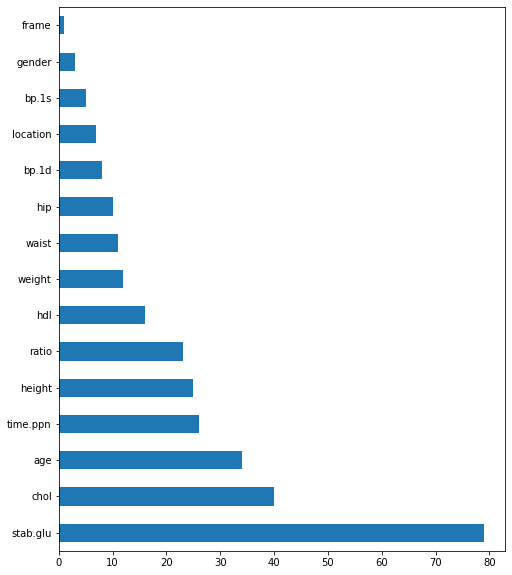

In [309]:
feat_imp = pd.Series(lg.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# LGBM Varient Without Embedding

In [310]:
from lightgbm import LGBMRegressor

In [311]:
cat_features_index = [4,6,9]

In [312]:
lgb = LGBMRegressor(max_depth=5,n_estimators=100,num_leaves=4,reg_lambda=0.3)

In [313]:
lgb.fit(x_train,y_train,categorical_feature=cat_features_index)

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


LGBMRegressor(max_depth=5, num_leaves=4, reg_lambda=0.3)

In [314]:
lgb.score(x_train,y_train)

0.7624496037594661

In [315]:
y_lgbm_emb = lgb.predict(x_test)

# LGBM Results

In [316]:
r2_score(y_test,y_lgbm_emb)

0.7490471277028068

In [317]:
mean_absolute_error(y_test,y_lgbm_emb)

0.7694938395970032

In [318]:
mean_squared_error(y_test,y_lgbm_emb)

1.3539703230459976

In [319]:
np.sqrt(mean_squared_error(y_test,y_lgbm_emb))

1.1636023045035608

In [320]:
MAPE(y_test,y_lgbm_emb)

0.1278851209751777

<AxesSubplot:>

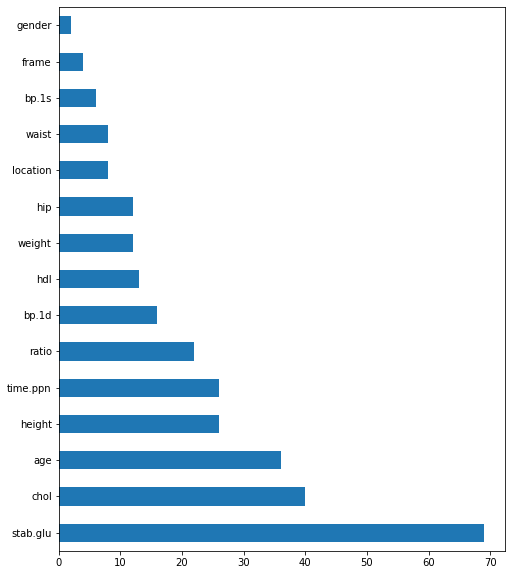

In [321]:
feat_imp = pd.Series(lgb.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# Catboost

In [335]:
from catboost import CatBoostRegressor

In [336]:
cb = CatBoostRegressor(depth=5,iterations=300,l2_leaf_reg= 14)

In [337]:
cb.fit(x_train,y_train)

0:	learn: 2.1576223	total: 1.95ms	remaining: 584ms
1:	learn: 2.1361665	total: 4.2ms	remaining: 626ms
2:	learn: 2.1160162	total: 6.12ms	remaining: 605ms
3:	learn: 2.0991762	total: 8.06ms	remaining: 597ms
4:	learn: 2.0845449	total: 10.1ms	remaining: 599ms
5:	learn: 2.0701121	total: 11.6ms	remaining: 567ms
6:	learn: 2.0503628	total: 13.2ms	remaining: 552ms
7:	learn: 2.0329263	total: 15.3ms	remaining: 559ms
8:	learn: 2.0176097	total: 16.9ms	remaining: 546ms
9:	learn: 1.9995217	total: 18.6ms	remaining: 538ms
10:	learn: 1.9856611	total: 20.2ms	remaining: 530ms
11:	learn: 1.9703170	total: 21.8ms	remaining: 524ms
12:	learn: 1.9554006	total: 23.5ms	remaining: 518ms
13:	learn: 1.9457310	total: 25.1ms	remaining: 513ms
14:	learn: 1.9276079	total: 26.8ms	remaining: 509ms
15:	learn: 1.9148964	total: 28.4ms	remaining: 505ms
16:	learn: 1.9007729	total: 30.4ms	remaining: 506ms
17:	learn: 1.8854351	total: 31.8ms	remaining: 499ms
18:	learn: 1.8726682	total: 33.5ms	remaining: 495ms
19:	learn: 1.8569717	to

194:	learn: 1.1657863	total: 288ms	remaining: 155ms
195:	learn: 1.1646317	total: 290ms	remaining: 154ms
196:	learn: 1.1641430	total: 291ms	remaining: 152ms
197:	learn: 1.1629482	total: 293ms	remaining: 151ms
198:	learn: 1.1616270	total: 294ms	remaining: 149ms
199:	learn: 1.1607726	total: 295ms	remaining: 148ms
200:	learn: 1.1592304	total: 297ms	remaining: 146ms
201:	learn: 1.1574087	total: 298ms	remaining: 145ms
202:	learn: 1.1556074	total: 299ms	remaining: 143ms
203:	learn: 1.1547086	total: 300ms	remaining: 141ms
204:	learn: 1.1517494	total: 301ms	remaining: 139ms
205:	learn: 1.1499352	total: 302ms	remaining: 138ms
206:	learn: 1.1490962	total: 303ms	remaining: 136ms
207:	learn: 1.1486231	total: 304ms	remaining: 134ms
208:	learn: 1.1477606	total: 305ms	remaining: 133ms
209:	learn: 1.1461587	total: 306ms	remaining: 131ms
210:	learn: 1.1455743	total: 307ms	remaining: 129ms
211:	learn: 1.1436104	total: 307ms	remaining: 128ms
212:	learn: 1.1419719	total: 308ms	remaining: 126ms
213:	learn: 

In [338]:
cb.score(x_train,y_train)

0.7610018271908514

In [339]:
y_cb = cb.predict(x_test)

# Cat Boost REsults  
1) R2 Score
2) MAE
3) MSE
4) RMSE
5) MAPE

In [340]:
r2_score(y_test,y_cb)

0.7117615279712023

In [341]:
mean_absolute_error(y_test,y_cb)

0.7838503168636091

In [342]:
mean_squared_error(y_test,y_cb)

1.5551379568389223

In [343]:
np.sqrt(mean_squared_error(y_test,y_cb))

1.2470517057599986

In [344]:
MAPE(y_test,y_cb)

0.12494893585474362

<AxesSubplot:>

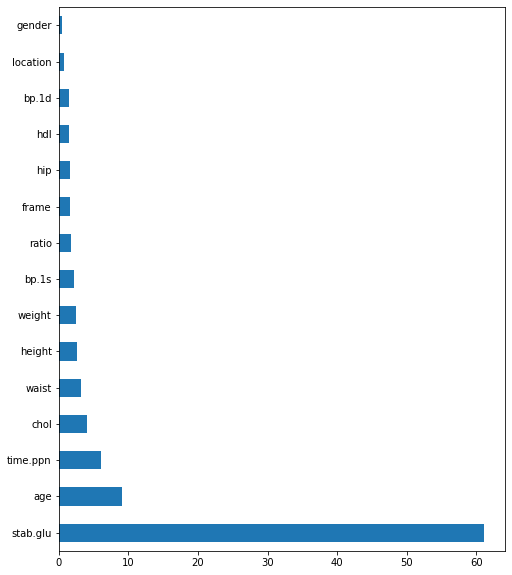

In [345]:
feat_imp = pd.Series(cb.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# Linear Regression

In [346]:
from sklearn.linear_model import LinearRegression

In [347]:
lr = LinearRegression()

In [348]:
combine.shape

(403, 15)

In [349]:
y

0       4.310000
1       4.440000
2       4.640000
3       4.630000
4       7.720000
         ...    
398    16.110001
399     4.390000
400    13.630000
401     4.490000
402     4.840000
Name: glyhb, Length: 403, dtype: float64

In [350]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [351]:
score = make_scorer(r2_score)

In [352]:
k = KFold(n_splits=10,random_state=42,shuffle=True)

In [353]:
scores = cross_val_score(lr,x_train,y_train,scoring ='r2',cv=k,n_jobs=-1)

In [354]:
scores

array([ 0.24937947,  0.21670795,  0.3818629 ,  0.25353131,  0.45070878,
        0.63230627,  0.51529065,  0.53330318,  0.70600698, -0.29586119])

In [355]:
np.median(scores)

0.41628584278304565

In [356]:
lr.fit(x_train,y_train)

LinearRegression()

In [357]:
y_lr_1 = lr.predict(x_test)

In [358]:
# y_lr = lr.predict(x_test)

In [359]:
lr.score(x_train,y_train)

0.5389821892895266

# LInear REgression Metrics

In [360]:
r2_score(y_test,y_lr_1)

0.8304053803906901

In [361]:
mean_absolute_error(y_test,y_lr_1)

0.7096555830149737

In [362]:
mean_squared_error(y_test,y_lr_1)

0.9150167511425955

In [363]:
np.sqrt(mean_squared_error(y_test,y_lr_1))

0.9565650794078757

In [364]:
MAPE(y_test,y_lr_1)

0.12529198683891035


# Ensemble

In [365]:
# y_ensemble = y_lgbm*0.5 + y_lgbm_emb*0.2 + y_pred*0.3

In [366]:
# y_ensemble = y_lr*0.6 + y_lgbm_emb*0.1 +  y_lgbm*0.3

###### Ensemble Best Result

In [367]:
# y_ensemble = y_lr_1*0.8 + y_lgbm_emb*0.1 + y_pred*0.1

In [413]:
y_ensemble = y_lr_1*0.8 + y_lgbm*0.1 +  y_lgbm_emb*0.1
# +  y_lgbm_emb*0.2

# Ensemble Metrics

In [414]:
r2_score(y_test,y_ensemble)

0.831708433279336

In [415]:
mean_absolute_error(y_test,y_ensemble)

0.691859391904534

In [416]:
mean_squared_error(y_test,y_ensemble)

0.9079863676110758

In [417]:
np.sqrt(mean_squared_error(y_test,y_ensemble))

0.9528831867606206

In [418]:
MAPE(y_test,y_ensemble)

0.12108645328920595

# Random Forrest

In [384]:
from sklearn.ensemble import RandomForestRegressor

In [385]:
rf = RandomForestRegressor(n_estimators=20,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,)

In [386]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, n_estimators=20)

In [387]:
rf.score(x_train,y_train)

0.6166280137905097

In [388]:
y_rf = rf.predict(x_test)

In [389]:
r2_score(y_test,y_rf)

0.6529235002314384

In [390]:
mean_absolute_error(y_test,y_rf)

0.8664198084544279

In [391]:
mean_squared_error(y_test,y_rf)

1.8725877739976342

In [392]:
np.sqrt(mean_squared_error(y_test,y_rf))

1.368425289885288

In [393]:
MAPE(y_test,y_rf)

0.13815389236819425

# Decision Tree


In [404]:
from sklearn.tree import DecisionTreeRegressor

In [395]:
dt = DecisionTreeRegressor(max_depth=1,min_samples_leaf=2,min_samples_split=2)
# ,min_samples_leaf=3,min_samples_split=3

In [396]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=2)

In [397]:
dt.score(x_train,y_train)

0.5112469614813993

In [398]:
y_dt = dt.predict(x_test)

# Metrics For Decision Tree

In [399]:
r2_score(y_test,y_dt)

0.6264471320214846

In [400]:
mean_squared_error(y_test,y_dt)

2.015436176130535

In [401]:
mean_absolute_error(y_test,y_dt)

0.8979387887929632

In [402]:
np.sqrt(mean_absolute_error(y_test,y_dt))

0.9475963216438544

In [403]:
MAPE(y_test,y_dt)

0.1477796864416472

# Techniques For Preprocessing

In [456]:
numerical_col = x_train.select_dtypes(["float64","int64"]).columns

# Correlation Between Different Features Checking Helps in selecting features  Not Much of use for this Data set

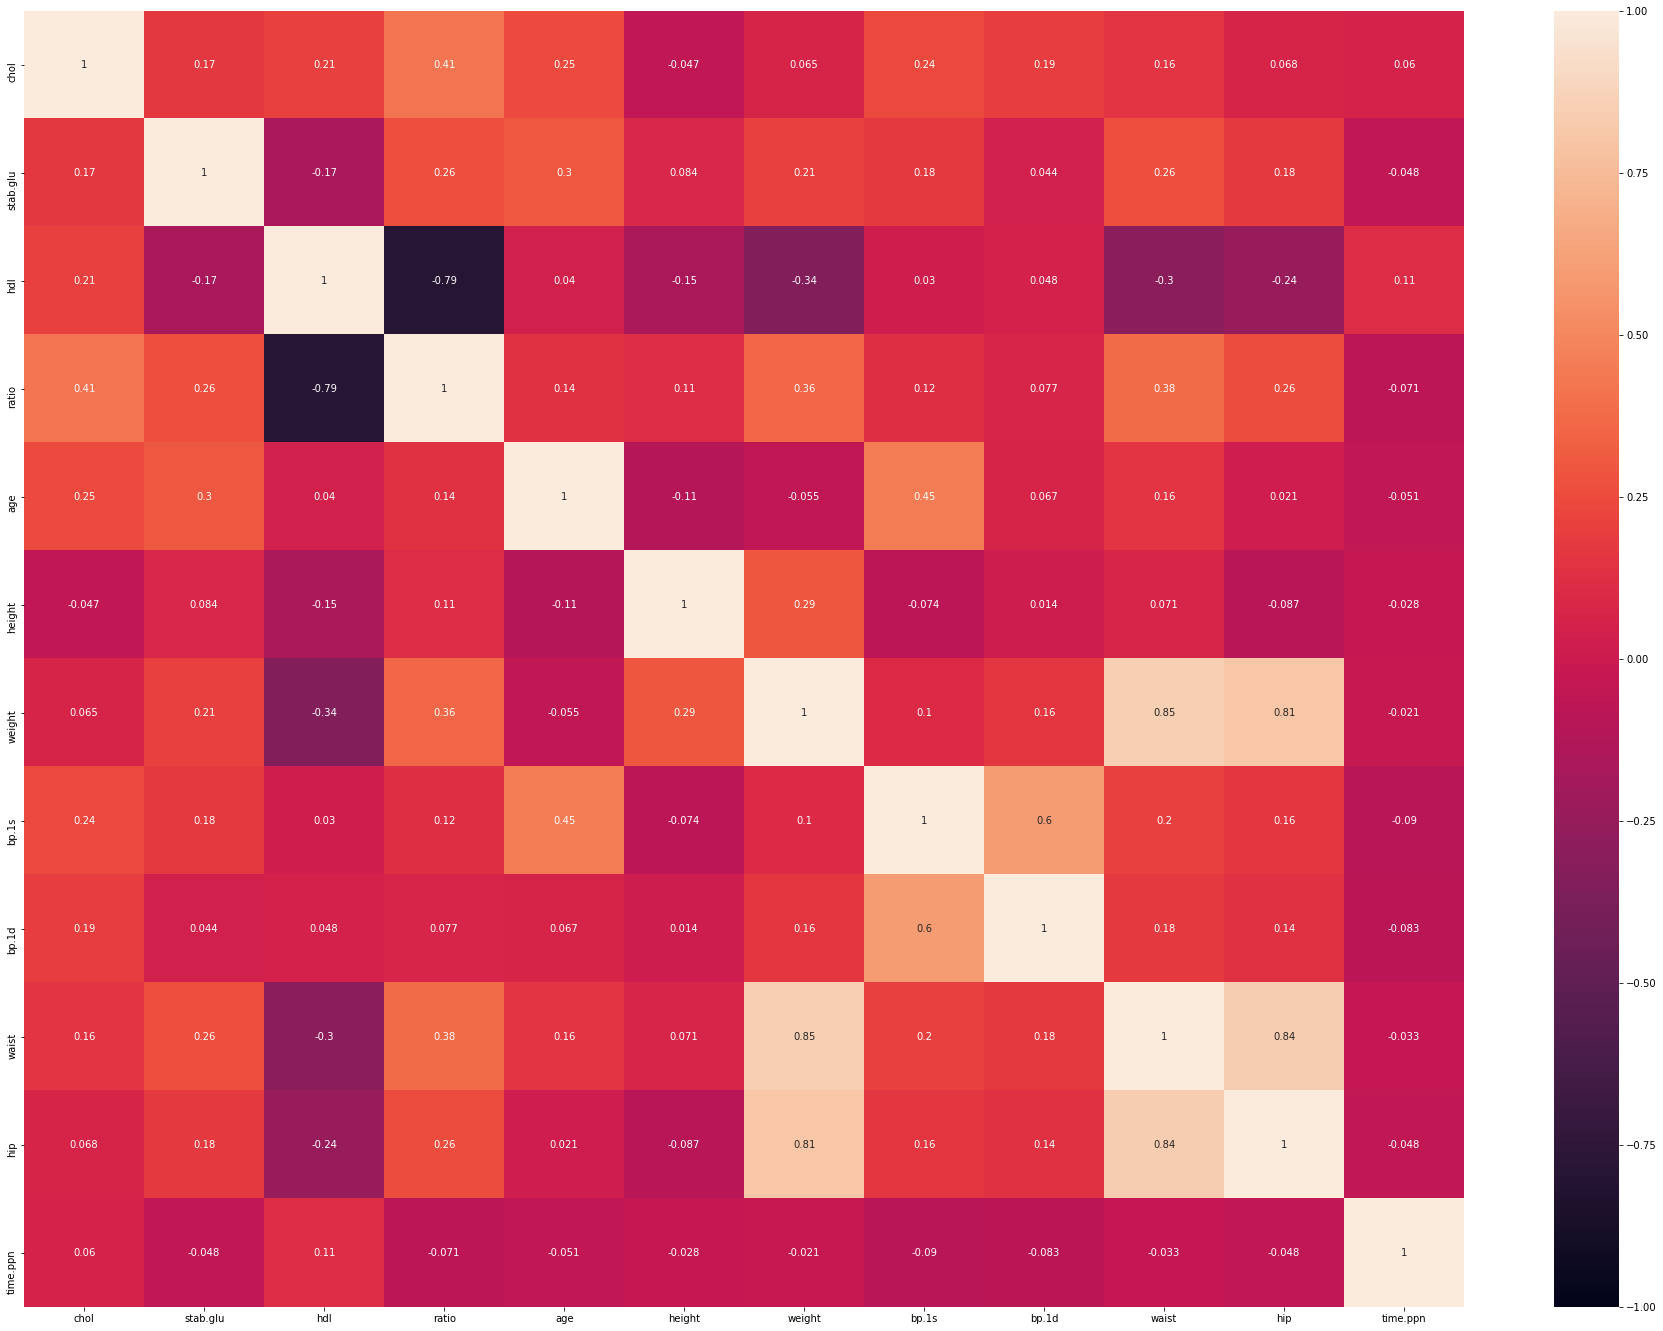

In [457]:
fig = plt.figure(figsize=(25,18))

fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0]

corr_mat = x_train[numerical_col].corr()

sns.heatmap(corr_mat,ax=ax,vmin=-1,vmax=1,annot=True)
# plt.savefig("./heatmap.jpg", bbox_inches="tight")

plt.show()

In [389]:
x_train.drop(columns=["waist","hip","ratio"],inplace=True)
x_test.drop(columns=["waist","hip","ratio"],inplace=True)

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [393]:
x_test

,chol,stab.glu,hdl,location,age,gender,height,weight,bp.1s,bp.1d,time.ppn,large,medium,small
70,171.0,4.521789,7.348469,0,40,1,71.0,5.365976,138.0,94.0,240.0,0,1,0
281,293.0,4.744932,7.348469,0,50,1,71.0,5.135798,131.0,75.0,120.0,0,1,0
283,198.0,4.521789,7.874008,1,60,1,70.0,5.093750,126.0,78.0,795.0,0,1,0
33,182.0,4.442651,6.082763,0,61,0,69.0,5.159055,176.0,86.0,330.0,0,1,0
42,225.0,4.418841,6.480741,0,36,1,67.0,5.257495,149.0,89.0,30.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,243.0,3.951244,7.681146,0,37,0,64.0,5.451038,110.0,82.0,90.0,0,1,0
90,159.0,4.477337,6.557439,1,38,1,68.0,5.129899,138.0,79.0,690.0,1,0,0
248,237.0,4.770685,6.708204,0,73,0,64.0,5.159055,162.0,75.0,300.0,1,0,0
337,261.0,4.615121,9.110434,1,52,0,64.0,5.288267,152.0,92.0,20.0,0,1,0


# Checking Different Features (EDA)

In [608]:
x_train

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
353,206.0,4.418841,8.246211,1.098612,Louisa,52,male,69.0,5.030438,small,140.0,98.0,3.583519,40.0,195.0
233,196.0,4.744932,7.874008,1.163151,Louisa,50,male,67.0,4.941642,medium,176.0,110.0,3.555348,37.0,60.0
3,78.0,4.532599,3.464102,1.871802,Buckingham,67,male,67.0,4.779123,large,110.0,50.0,3.496508,38.0,480.0
18,194.0,4.394449,6.000000,1.686399,Louisa,36,male,64.0,4.836282,medium,110.0,76.0,3.401197,34.0,120.0
131,188.0,4.343805,6.708204,1.435084,Louisa,31,female,67.0,5.424950,medium,122.0,70.0,3.850148,53.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,164.0,4.454347,6.324555,1.410987,Buckingham,23,female,69.0,5.501258,large,126.0,75.0,3.784190,47.0,420.0
106,293.0,4.442651,9.695360,1.131402,Louisa,31,female,67.0,5.298317,medium,110.0,90.0,3.713572,42.0,240.0
270,147.0,4.454347,5.830952,1.458615,Buckingham,38,male,69.0,5.323010,small,130.0,96.0,3.663562,41.0,480.0
348,122.0,4.406719,6.557439,1.029619,Louisa,36,female,71.0,5.209486,medium,110.0,80.0,3.713572,45.0,90.0


In [609]:
cat_cols = ["location","gender","frame"]

In [612]:
num_cols = ["chol","stab.glu","hdl","ratio","age","height","weight","bp.1s","bp.1d","waist","hip","time.ppn"]

In [618]:
x_train["hdl"].median()

6.782329983125268

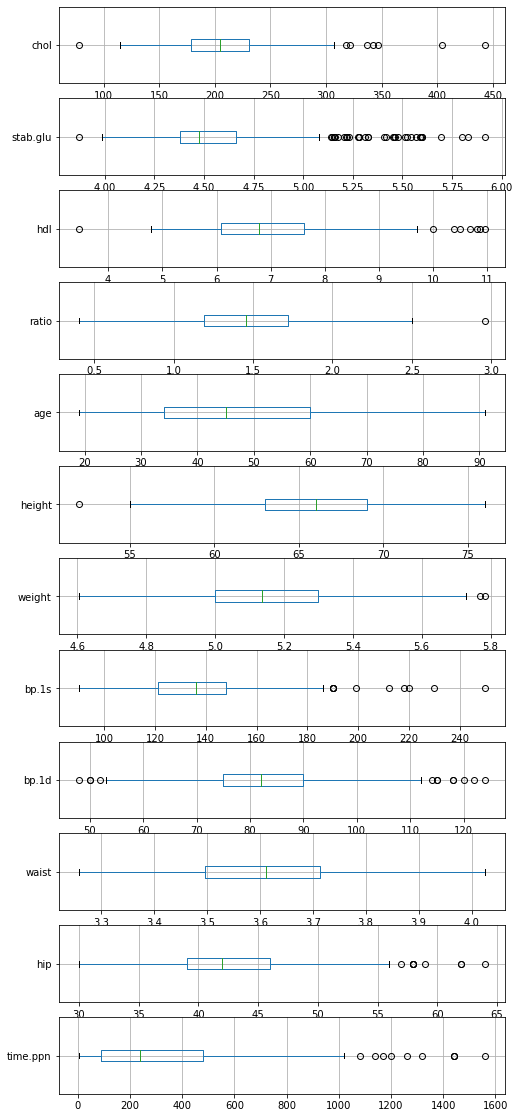

In [614]:
fig, axes = plt.subplots(12, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = x_train[[c]].boxplot(ax=axes[i], vert=False)

In [623]:
train = x_train[num_cols]

In [ ]:
cat_cols = ["location","gender","frame"]

In [631]:
num_cols

['chol',
 'stab.glu',
 'hdl',
 'ratio',
 'age',
 'height',
 'weight',
 'bp.1s',
 'bp.1d',
 'waist',
 'hip',
 'time.ppn']

In [630]:
y_train.median()

4.84000015

In [63]:
x_train["time.ppn"].unique()

array([ 195.,   60.,  480.,  120.,  140.,  210.,  300.,  240.,  180.,
        330., 1200.,   30.,  960.,   90., 1020.,  540.,  225.,  570.,
         10.,  360.,  720., 1440.,  390.,  150.,   20.,  315.,  900.,
        270.,   45.,  780.,  450.,  420., 1560., 1260.,  285., 1320.,
       1170.,   15.,  135.,  375.,  435.,  840.,  255.,  260.,   40.,
        510.,  855.,  660.,    5.,  105.,   80., 1140.,  990.,  630.,
       1080.])

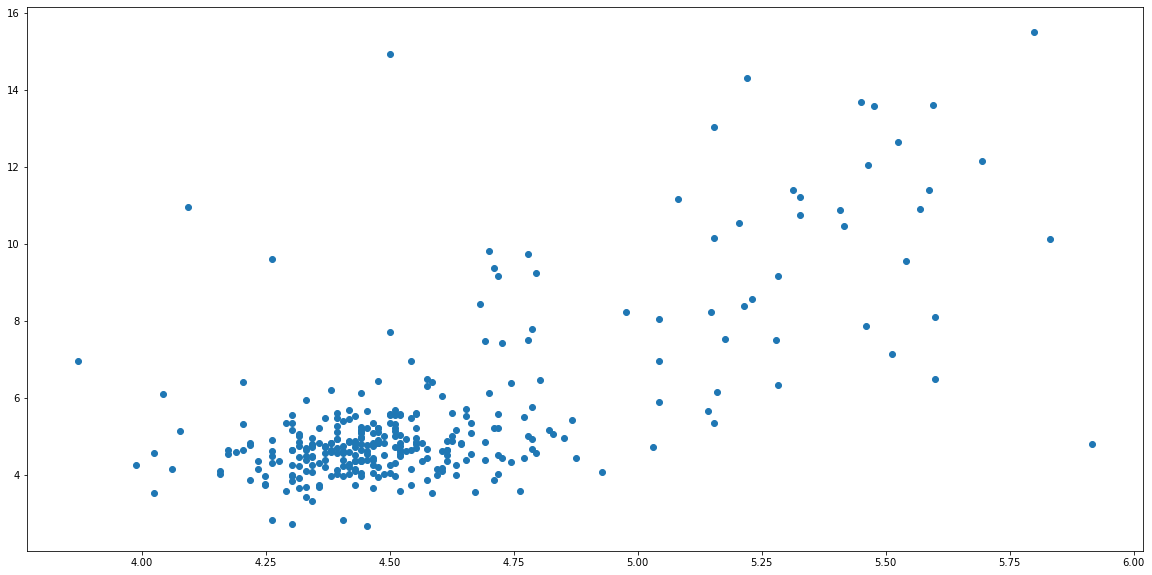

In [74]:
plt.figure(figsize=(20,10))
plt.scatter(y=y_train.values,x=x_train["stab.glu"].values)
plt.show()

<Figure size 1440x720 with 0 Axes>

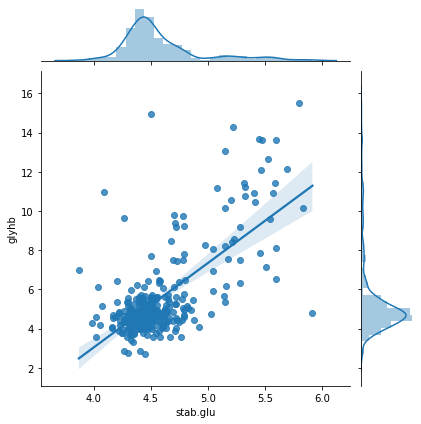

In [75]:
plt.figure(figsize=(20,10))
sns.jointplot(x=x_train["stab.glu"],y=y_train,kind="reg")
plt.show()